In [20]:
import csv
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
#from wordcloud import WordCloud
import tempfile

import preprocessor as p


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import RSLPStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import itertools


%matplotlib inline

# Métodos de Pré Processamento 

In [4]:
def remove_stopwords(text):
     # remove punctuation
    chars = ['…','.', '/', ''', ''', '?', '!', '$', '%', '^', '&',
             '*', '(', ')', ' - ', '_', '+', '=', '@', ':',
             '\\', ',',
             ';', '~', '`', '<', '>', '|', '[', ']', '{', '}',
             '–', '“',
             '»', '«', '°', '’', '1', '2',
             '3', '4', '5', '6', '7', '8', '9', '0', 'https', 'http']
    for c in chars:
        text= text.replace(c,' ').lower()
    text = text.split()
    import nltk
    # Caso seja preciso mudar o idioma, basta inserir o idioma desejado no parâmetro.
    stopwords = nltk.corpus.stopwords.words('portuguese')
    content = [w for w in text if w.lower().strip() not in stopwords]

    return content

In [5]:
def tokenize(text):
    tokens = word_tokenize(text)
    porter = RSLPStemmer()
    tokens = [porter.stem(t) for t in tokens]
    tokens = [
                t for t in tokens
                    if len(t)> 2 and not t.isdigit()
    ]
    return tokens

In [6]:
def remove_emoji(text):
#    print(text)
   d=[]
   d = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
   d = d.sub(r'', text)
   return d

In [7]:
def remove_url(text):
   b=[]
   b = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
   return b

In [8]:
def remove_mentions(text):
   c=[]
   c = re.sub(r"(?:\@|https?\://)\S+", "", text)
   c = re.sub('[rt]', "", c)
   return c

In [9]:
def remove_hashtag(text):
    words = text.split()
    for i in words:
        if i.startswith('#'):
            words.remove(i)
    text = ''.join(text)
    return text

In [10]:
def aplica_steaming(text):
    stemmer = nltk.steam.RLSPStemmer()
    tweetsStemming = []
    for doc in text:
        comStemming = [srt(stemmer.steam(d)) for d in text.splip()]
        tweetsStemming.append(comStemming)

In [11]:
dataset = csv.reader(open('data/dataset.csv', 'r', encoding='utf-8'))
list_docs = []
list_labels = []

for row in dataset:
    list_docs.append(row[1])
    list_labels.append(row[2])

In [12]:
print(list_docs, list_labels)

['@dim37w obrigada dimm. foi importante a pergunta :)', 'caso alguem ainda não saiba pq eu parei de dar conselho pra gente que eu não conheço na internet: tá aí a tua explicação :)', '@cattfilipa tou a comer O pudim :)', 'fds tive tnt tempo solteira e isto acontece agr :)', 'fala galera saiu um videio novo la no meu canal si gostou si inscreva-si muito obg pela\nGP GAMEPLAYS OBG  :3 &lt;* :)… https://t.co/HOkJo4TMnq', '@dallas_ftgrier de nada :)', '@paravertudo @FutFemSCP @Sporting_CP Não sejas guloso. Espera pelo final :)', '@matthewdwddario Fiquei feliz que escolheram um diretor gay pro filme :)', 'enquanto eu to ajudando (mesmo sem conhecer a mina) eu sou uma linda ai miga ai obrigada ❤️❤️❤️\n\nsenão eu sou uma vagabunda fodida :)', 'Smilers estão subindo a hashtag #WeLoveYouMiley! Vamos ajudar :)', 'Hoje eu tô good vibes pfvr migos colaborem cmg pra permanecer assim :)', 'hoje :) https://t.co/kPU8QZHkdu #NowPlaying', '@BbmasAnalytics INDIA  :)\n#BTSBBMAs', '@guifa_gamer valeu pelo 

In [13]:
count_0=0
count_1=0

list_0=[]
list_1=[]

documents = []
labels    = []

doc = []
with open('data/dataset.csv','r', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter =',')
    for row in reader:
        if int(row[2])==1:
            count_1+=1
            list_1.append(row[0])
        else:
            count_0+=1
            list_0.append(row[0])
            
        documents.append(row[1])
        labels.append(row[2])

In [14]:
clean_documents = []
for doc in documents:
    #usando as funcões da tweetpreprocess
    tweetsLimpos = p.clean(doc)
    tweetsPreProcessados = remove_stopwords(tweetsLimpos)
    #tokenizado = tokenize(tweetsPreProcessados)
    document = ' '.join(tweetsPreProcessados)
    clean_documents.append(document)

    
tokenizado_documents = []
for doc in clean_documents:
    tokenizado = tokenize(doc)
    document = ' '.join(tokenizado)
    tokenizado_documents.append(document)

In [49]:
print(tokenizado_documents)

['obrig dimm import pergunt', 'cas algu aind saib par dar conselh pra gent conheç internet elic', 'tou com pudim', 'tnt temp solt acontec agr', 'fal gal saiu videi nov canal gost inscreva-s obg gameplay obg', 'nad', 'sej gul esper final', 'fiq feliz escolh dire gay pro film', 'enquant ajud conhec min lind mig obrig ️️️ senã vagabund fod', 'smil sub hashtag vam ajud', 'hoj good vib pfvr mig colabor cmg pra permanec assim', 'hoj', 'ind', 'val reconhec man apreci verdad', 'obrig nen', 'dia faz histór cont', 'fal', 'obrig', 'etern ora', 'lind vou pra salv prox', 'temp verb err', 'sabad est toc apart botec amig situ etap quadr bor tom cerv gel', 'amig snap aguent', 'enfim dia menos descans vou curt show bbng hoj part pra', 'encontr felic pequen cois tempestad irá arruin complet dia', 'força-taref liber muit inform pergunt prov boa pesquis', 'parab', 'ano pass receb apresent vam ver ano fic promess', 'macet element atribut pat', 'olá quer sim hahah', 'dificuldad pra acord ced coloqu despert 

# Matrix de Confusão

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe Real')
    plt.xlabel('Classe Classificada')

# DESCRIÇÃO DA BASE DE DADOS

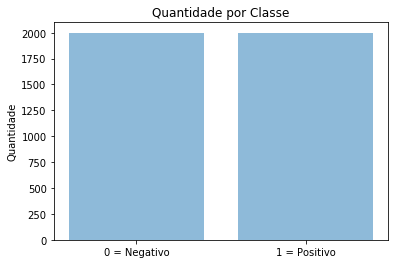

In [16]:
objects = ('0 = Negativo', '1 = Positivo')
y_pos = np.arange(len(objects))
performance = [count_0, count_1]

plt.bar(y_pos, performance, align='center',alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Quantidade')
plt.title('Quantidade por Classe')

plt.show()

# TF-IDF

In [17]:
vectorizer = TfidfVectorizer(use_idf=True)
X = vectorizer.fit_transform(tokenizado_documents)
y = labels

# MÉTRICAS: ACURÁCIA, F1, RECALL, PRECISION

In [28]:
def train(classifier, X, y, class_names):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=81)
    
    ##TREINANDO MEU ALGORITMO
    classifier.fit(X_train, y_train)
    
    ##Predicoes para medição da Acurácia
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    
    print("Acurracia: %s" % classifier.score(X_test,y_test))
    print("F1: %s" % str(f1_score(y_test, y_pred, average=None )))
    print("Recall: %s"% str(recall_score(y_test, y_pred, average=None)))
    print("Precision: %s" % str(precision_score(y_test, y_pred, average=None)))
    
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Matriz de Confusao')
    
    plt.show()
    
    return classifier

# MultinomialNB

Acurracia: 0.68
F1: [0.69 0.67]
Recall: [0.69 0.67]
Precision: [0.69 0.67]
Confusion matrix, without normalization
[[143  64]
 [ 64 129]]


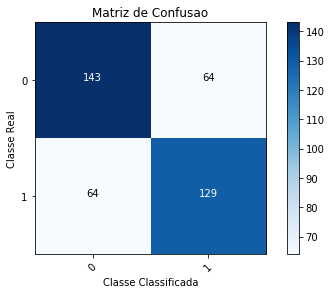

MultinomialNB(alpha=0.05, class_prior=None, fit_prior=True)

In [32]:
train(MultinomialNB(alpha=0.05), X, y, [0,1])

# Suport Vector Machine 

Acurracia: 0.69
F1: [0.68 0.7 ]
Recall: [0.63 0.76]
Precision: [0.73 0.65]
Confusion matrix, without normalization
[[130  77]
 [ 47 146]]


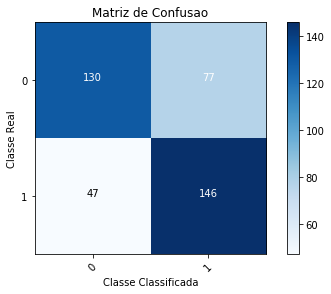

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
train(svm.SVC(kernel='linear', C=1.0), X,y, [0,1])

# SGDClassifier

c:\users\jarde\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Acurracia: 0.69
F1: [0.69 0.69]
Recall: [0.66 0.73]
Precision: [0.72 0.66]
Confusion matrix, without normalization
[[136  71]
 [ 53 140]]


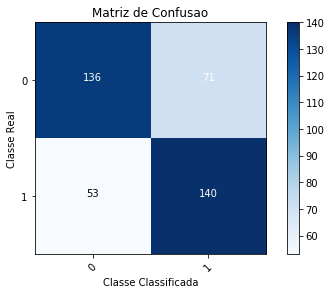

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [31]:
train(SGDClassifier(alpha=0.0001), X,y, ['0','1'])

# CrossValidation

In [27]:
from multiscorer import MultiScorer
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer


models = [MultinomialNB(alpha=0.05), svm.SVC(kernel='linear', C=1.0), SGDClassifier(alpha=0.0001)]
names = ['MultinomialNB', 'SVM', 'SGDC']

scorer = MultiScorer({
    'Accuracy' : (accuracy_score, {}),
    'Precision' : (precision_score, {'pos_label': 3, 'average':'macro'}),
    'Recall' : (recall_score, {'pos_label': 3, 'average':'macro'})
})

for model, name in zip(models, names):
    print (name)
    start = time.time()

    cross_val_score(model, X, y,scoring=scorer, cv=5)
    results = scorer.get_results()

    for metric_name in results.keys():
        average_score = np.average(results[metric_name])
        print('%s : %f' % (metric_name, average_score))

    print ('time :', time.time() - start, '\n\n')
    
#    for metric_name in results.keys():
#        average_score = np.average(results[metric_name])
#        print('%s : %f' % (metric_name, average_score))
#    
#    print ('time :', time.time() - start, '\n\n')

#scores_MultinomialNB_classifier = cross_validate(MultinomialNB_classifier, X, y, cv=cv, scoring=scoring)
#print (scores.keys(), 
#       scores_MultinomialNB_classifier)

#scores_SVM_classifier = cross_validate(SVM_classifier, X, y, cv=cv, scoring=scoring)
#print (scores.keys(),
#       scores_SVM_classifier)

#scores_SGDC_Classifier = cross_val_score(SGDC_Classifier, X, y, cv=cv, score=scoring)
#print (scores_SGDC_Classifier)

MultinomialNB


c:\users\jarde\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1052: UserWarning: Note that pos_label (set to 3) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
c:\users\jarde\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1052: UserWarning: Note that pos_label (set to 3) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
c:\users\jarde\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1052: UserWarning: Note that pos_label (set to 3) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
c:\users\jarde\appdata\local\programs\python\python3

Accuracy : 0.680500
Precision : 0.682896
Recall : 0.680500
time : 2.1348350048065186 


SVM


c:\users\jarde\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1052: UserWarning: Note that pos_label (set to 3) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Accuracy : 0.686125
Precision : 0.688879
Recall : 0.686125
time : 5.940127611160278 


SGDC


c:\users\jarde\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\jarde\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1052: UserWarning: Note that pos_label (set to 3) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Accuracy : 0.687000
Precision : 0.689129
Recall : 0.687000
time : 0.38956260681152344 


